# 1.

In [38]:

def calculate_probability(production_rates, defective_rates):
    total_products = sum(production_rates)
    total_defective = sum(p * d for p, d in zip(production_rates, defective_rates))
    probability_defective = total_defective / total_products
    return probability_defective


production_rates = []
while True:
    for i in range(1, 4):
        production = float(input(f"\nEnter the rate of production produced by Factory {i} (between 0.10 and 0.40): "))
        if 0.10 <= production <= 0.40:
            production_rates.append(production)
        else:
            print("\nPlease enter a value between 0.10 and 0.40.")
            production_rates.clear()
            break
    if sum(production_rates) == 1:
        break
    else:
        print("\nThe sum of production rate should be equal to 1. Please try again.\n")
        production_rates.clear()

print("\n")
defective_rates = []
while True:
    for i in range(1, 4):
        rate = float(input(f"\nEnter the defective rate of products produced by Factory {i} (between 0.01 and 0.05): "))
        if 0.01 <= rate <= 0.05:
            defective_rates.append(rate)
        else:
            print("\nPlease enter a value between 0.01 and 0.05.")
            defective_rates.clear()
            break
    if sum(defective_rates) == 0.12:
        break
    else:
        print("\nThe sum of defective rates should be equal to 0.12. Please try again.\n")
        defective_rates.clear()

probability_defective = calculate_probability(production_rates, defective_rates)

print("\nThe probability of randomly selecting a defective product: {:.2f}%".format(probability_defective * 100))




Enter the rate of production produced by Factory 1 (between 0.10 and 0.40): 0.2

Enter the rate of production produced by Factory 2 (between 0.10 and 0.40): 0.4

Enter the rate of production produced by Factory 3 (between 0.10 and 0.40): 0.4



Enter the defective rate of products produced by Factory 1 (between 0.01 and 0.05): 0.05

Enter the defective rate of products produced by Factory 2 (between 0.01 and 0.05): 0.05

Enter the defective rate of products produced by Factory 3 (between 0.01 and 0.05): 0.01

The sum of defective rates should be equal to 0.12. Please try again.


Enter the defective rate of products produced by Factory 1 (between 0.01 and 0.05): 0.05

Enter the defective rate of products produced by Factory 2 (between 0.01 and 0.05): 0.05

Enter the defective rate of products produced by Factory 3 (between 0.01 and 0.05): 0.02

The sum of defective rates should be equal to 0.12. Please try again.


Enter the defective rate of products produced by Factory 1 (between 0.

# 2. 

In [13]:
import pandas as pl
from fractions import Fraction
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.stats import geom

A. Univariate

In [3]:
 
uni_var_name = input("Welcome! Please input the Name of the Discrete Variable: ")
print("\n")
univar_n = int(input("Please enter the number of events in your variable: "))
print("\n")

event_uni = []
prob_event_uni = []
for n in range(univar_n):
    while True: #loop for input of event
        event = input(f"\nPlease enter the value associated with event {n+1}: ")
        
        #checking for integer
        try:
            int(event)
        except:
            print("Integers only")
            continue
            
        #checking if event is already in sample space
        if (event not in event_uni):
            event_uni.append(event)
            break
        else:
            print("That event has already been inputted, redo input")

    #probability for the event
    while True:

        probaby = input(f"Please enter the probability of the event {event_uni[n]} in decimals (remember that the sum of probabilities must amoung to 1): ")

        #checking for fractions and decimals
        if ("/" in probaby) and (probaby.count("/")<2) and (" " not in probaby):
            probaby = float(Fraction(probaby))
        elif ("." in probaby) and (probaby.count(".")<2):
            probaby = float(probaby)
        else:
            print("invalid given probability\n")
            continue


        #checking for within 1 and 0
        if (probaby > 1) or (probaby < 0):
            print("The given probability is not within 0 and 1.\n")
            continue

        #checking if new probability will bring the sum of probability over 1
        if (sum(prob_event_uni)+probaby > 1):
            print("The new probability will bring the total probability over one, please enter another value.\n")
            continue

        prob_event_uni.append(probaby)
        break

uni_df = pl.DataFrame(columns = event_uni)        
uni_df.loc['p(x)'] = prob_event_uni

#checking for probability == 1
while True:
    if sum(prob_event_uni)!=1:
        print("\nThe total probability is not equal to one, please change one of the probabilities for the sum to equal 1:\n")
        print(uni_df)
        print("\n")

        #getting the event
        modi_e = input("Please specify which event you will change the probability of: ")
        if modi_e not in uni_df.columns:
            print("The chosen event is not in the given sample space")
        else:
            
            while True:
                
                probaby = input(f"Please give the new probability of the event {modi_e}: ")

                #checking for fractions and decimals
                if ("/" in probaby) and (probaby.count("/")<2) and (" " not in probaby):
                    probaby = float(Fraction(probaby))
                elif ("." in probaby) and (probaby.count(".")<2):
                    probaby = float(probaby)
                else:
                    print("invalid given probability\n")
                    continue

                #checking for within 1 and 0
                if (probaby > 1) or (probaby < 0):
                    print("The given probability is not within 0 and 1.\n")
                    continue
                
                uni_df.loc[0,modi_e] = probaby
                                
    else:
        break

print("\n")
print(uni_df)

mean_uni = 0
var_inc_uni = 0
for p in range(len(uni_df.columns)):
    mean_uni += float(uni_df.columns[p])*uni_df.loc['p(x)',uni_df.columns[p]]
    var_inc_uni += (float(uni_df.columns[p])**2)*uni_df.loc['p(x)',uni_df.columns[p]]

var_uni = var_inc_uni - (mean_uni**2)

print("\n")
print("the mean is: ", mean_uni,"\n")
print("the variance is: ", var_uni,"\n")
    

Welcome! Please input the Name of the Discrete Variable: 3 die


Please enter the number of events in your variable: 3



Please enter the value associated with event 1: 1
Please enter the probability of the event 1 in decimals (remember that the sum of probabilities must amoung to 1): 2
invalid given probability

Please enter the probability of the event 1 in decimals (remember that the sum of probabilities must amoung to 1): 3
invalid given probability

Please enter the probability of the event 1 in decimals (remember that the sum of probabilities must amoung to 1): 3/12

Please enter the value associated with event 2: 5/12
Integers only

Please enter the value associated with event 2: 2
Please enter the probability of the event 2 in decimals (remember that the sum of probabilities must amoung to 1): 5/12

Please enter the value associated with event 3: 3
Please enter the probability of the event 3 in decimals (remember that the sum of probabilities must amoung to 1): 4/12


        

In [ ]:
cdf = np.cumsum(uni_df.loc['p(x)'])

plt.plot(uni_df.columns, uni_df.loc['p(x)'], color="red", label="Probability Density Function") 
plt.plot(uni_df.columns, cdf, label="Cumulative Density Function") 
plt.title("Distribution functions of "+uni_var_name)
plt.legend() 

B. Bivariate

In [6]:
#x var establishment
x_var_name = input("Welcome! Please input the Name of the Discrete Variable X: ")
print("\n")
xvar_n = int(input(f"Please enter the number of events in variable {x_var_name}: "))
print("\n\n")

eventx = []
eventy = []

#get event values for x
for n in range(xvar_n):
    while True: #loop for input of event
        event = input(f"\nPlease enter the value associated with {n+1}th event of {x_var_name}: ")
        
        #checking for integer
        try:
            int(event)
        except:
            print("Integers only")
            continue
        
        #checking if event is already in sample space
        if (event not in eventx):
            eventx.append(event)
            break
        else:
            print("That event has already been inputted, redo input")
            
#y var establishment
y_var_name = input("\n\nPlease input the Name of the Discrete Variable Y: ")
print("\n")
yvar_n = int(input(f"Please enter the number of events in variable {y_var_name}: "))
print("\n")

#get event values for y
for n in range(yvar_n):
    while True: #loop for input of event
        event = input(f"\nPlease enter the value associated with {n+1}th event of {y_var_name}: ")
        
        #checking for integer
        try:
            int(event)
        except:
            print("Integers only")
            continue
            
        #checking if event is already in sample space
        if (event not in eventy):
            eventy.append(event)
            break
        else:
            print("That event has already been inputted, redo input")

bi_df = pl.DataFrame(columns = eventx)


for p in range(yvar_n):
    bi_prob_row = []
    
    for b in range(xvar_n):
        while True:

            probabu = input(f"\nPlease enter the probability of the event X={eventx[b]} and Y={eventy[p]} in decimals or fractions (remember that the sum of probabilities must amoung to 1): ")

            #checking for fractions and decimals
            if ("/" in probabu) and (probabu.count("/")<2) and (" " not in probabu):
                probabu = float(Fraction(probabu))
            elif ("." in probabu) and (probabu.count(".")<2):
                probabu = float(probabu)
            else:
                print("invalid given probability\n")
                continue

            #checking for within 1 and 0
            if (probabu > 1) or (probabu < 0):
                print("The given probability is not within 0 and 1.\n")
                continue 

            bi_prob_row.append(probabu)
            break
        
        
    bi_df.loc[ eventy[p] ] = bi_prob_row
        
        
#infinite loop to conduct checking, break if satisfies condition? or di na basta makapag input variables,
#change variables if not == 1

while True:
    if bi_df.sum().sum()!=1:
        print("\nThe total probability is not equal to one, please change one of the probabilities for the sum to equal 1:\n")
        print(bi_df)
        print("\n")

        #getting the event to be modified
        print("Please specify which event you will change the probability of: ")
        
        #X value
        modi_x = input("Value of X: ")
        print("\n")
        if modi_x not in bi_df.columns:
            print("The chosen event is not in the given sample space")
            continue
        
        modi_y = input("Value of Y: ")
        print("\n")
        if modi_y not in bi_df.index:
            print("The chosen event is not in the given sample space")
            continue
            
        bi_df.loc[modi_y,modi_x] = float(input(f"Please give the new probability of the event X = {modi_x} and Y = {modi_y}: "))
        
        while True:

            proba = input(f"Please give the new probability of the event X = {modi_x} and Y = {modi_y}: ")
            #checking for fractions and decimals
            if ("/" in proba) and (proba.count("/")<2) and (" " not in proba):
                proba = float(Fraction(proba))
            elif ("." in proba) and (proba.count(".")<2):
                proba = float(proba)
            else:
                print("invalid given probability\n")
                continue

            #checking for within 1 and 0
            if (proba > 1) or (proba < 0):
                print("The given probability is not within 0 and 1.\n")
                continue 

            bi_df.loc[modi_y,modi_x] = proba
            break
        
    else:
        break
        
#getting marginal distribution:

bi_df.loc['marg_x'] = bi_df.sum(axis=0)

bi_df['marg_y'] = bi_df.sum(axis=1)

Welcome! Please input the Name of the Discrete Variable X: 3 coins


Please enter the number of events in variable 3 coins: 3




Please enter the value associated with 1th event of 3 coins: 1

Please enter the value associated with 2th event of 3 coins: 2

Please enter the value associated with 3th event of 3 coins: 3
Please input the Name of the Discrete Variable Y: 3 die


Please enter the number of events in variable 3 die: 3



Please enter the value associated with 1th event of 3 die: 1

Please enter the value associated with 2th event of 3 die: 2

Please enter the value associated with 3th event of 3 die: 3
Please enter the probability of the event X=1 and Y=1 in decimals or fractions (remember that the sum of probabilities must amoung to 1): 1/36
Please enter the probability of the event X=2 and Y=1 in decimals or fractions (remember that the sum of probabilities must amoung to 1): 5/36
Please enter the probability of the event X=3 and Y=1 in decimals or fractions (remember tha



the mean is:  2.36 

the variance is:  0.48 



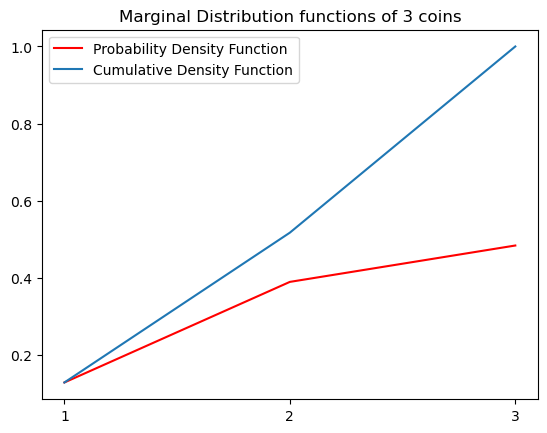

In [12]:
#plot for marginal distribution of x

mean_mar_x = 0
var_inc_mar_x = 0
for p in range(len(bi_df.columns)-1):
    mean_mar_x += float(bi_df.columns[p])*bi_df.loc['marg_x',bi_df.columns[p]]
    var_inc_mar_x += (float(bi_df.columns[p])**2)*bi_df.loc['marg_x',bi_df.columns[p]]

var_mar_x = var_inc_mar_x - (mean_mar_x**2)

print("\nFor the marginal distribution of X:\n")
print("the mean is: ", round(mean_mar_x,2),"\n")
print("the variance is: ", round(var_mar_x,2),"\n")


cdf_margx = np.cumsum(bi_df.loc['marg_x'][:-1])

plt.plot(bi_df.columns[:-1], bi_df.loc['marg_x'][:-1], color="red", label="Probability Density Function") 
plt.plot(bi_df.columns[:-1], cdf_margx, label="Cumulative Density Function") 
plt.title("Marginal Distribution functions of "+ x_var_name)
plt.legend() 
plt.show()



the mean is:  2.15 

the variance is:  0.63 



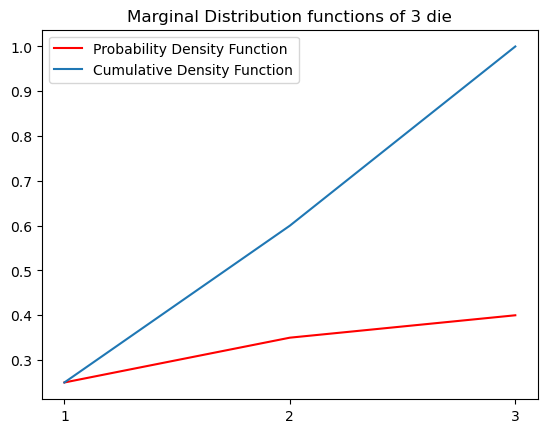

In [10]:
#plot for marginal distribution of y

mean_mar_y = 0
var_inc_mar_y = 0
for p in range(len(bi_df.index)-1):
    mean_mar_y += float(bi_df.index[p])*bi_df.loc[bi_df.index[p],'marg_y']
    var_inc_mar_y += (float(bi_df.index[p])**2)*bi_df.loc[bi_df.index[p],'marg_y']

var_mar_y = var_inc_mar_y - (mean_mar_y**2)

print("\nFor the marginal distribution of Y:\n")
print("the mean is: ", round(mean_mar_y,2),"\n")
print("the variance is: ", round(var_mar_y,2),"\n")


cdf_margy = np.cumsum(bi_df['marg_y'][:-1])

plt.plot(bi_df.index[:-1], bi_df['marg_y'][:-1], color="red", label="Probability Density Function") 
plt.plot(bi_df.index[:-1], cdf_margy, label="Cumulative Density Function") 
plt.title("Marginal Distribution functions of "+ y_var_name)
plt.legend()
plt.show()

In [8]:
bi_df

,1,2,3,marg_y
1,0.027778,0.138889,0.083333,0.25
2,0.050000,0.100000,0.200000,0.35
3,0.050000,0.150000,0.200000,0.40
marg_x,0.127778,0.388889,0.483333,1.00


Remember [:-1] to account for marginal distribution in the dataframe

In [ ]:
#plot conditional distribution of x given y (they can choose y value)
#input for what Y value to look at
print("Conditional distribution of X given Y = y")

while True:
    y_var_show = input("Please choose y: ")
    
    if y_var_show not in eventy:
        print("please choose an event Y = y from the sample space.\n")
        continue
    else:
        
        break

mean_cond_x = 0
var_inc_cond_x = 0
for p in range(len(bi_df.columns)-1):
    mean_cond_x += float(bi_df.columns[p])*bi_df.loc[y_var_show,bi_df.columns[p]]
    var_inc_cond_x += (float(bi_df.columns[p])**2)*bi_df.loc[y_var_show,bi_df.columns[p]]

var_cond_x = var_inc_cond_x - (mean_cond_x**2)

print("\nFor the Conditional distribution of X given Y = y:\n")
print("the mean is: ", round(mean_cond_x,2),"\n")
print("the variance is: ", round(var_cond_x,2),"\n")


cdf_cond_y = np.cumsum(bi_df.loc[y_var_show][:-1])

plt.plot(bi_df.columns[:-1], bi_df.loc[y_var_show][:-1], color="red", label="Probability Density Function") 
plt.plot(bi_df.columns[:-1], cdf_cond_y, label="Cumulative Density Function") 
plt.title("Marginal Distribution functions of "+ x_var_name + f" Given Y = {y_var_show}")
plt.legend() 
plt.show()

In [ ]:
#plot conditional distribution of y given x (they can choose x value)
#input for what x value to look at
print("Conditional distribution of Y given X = x")

while True:
    x_var_show = input("Please choose x: ")
    
    if x_var_show not in eventx:
        print("please choose an event X = x from the sample space.\n")
        continue
    else:
        
        break

        
mean_cond_y = 0
var_inc_cond_y = 0
for p in range(len(bi_df.index)-1):
    mean_cond_y += float(bi_df.index[p])*bi_df.loc[bi_df.index[p],x_var_show]
    var_inc_cond_y += (float(bi_df.index[p])**2)*bi_df.loc[bi_df.index[p],x_var_show]

var_cond_y = var_inc_cond_y - (mean_cond_y**2)

print("\nFor the Conditional distribution of Y given X = x:\n")
print("the mean is: ", round(var_cond_y,2),"\n")
print("the variance is: ", round(var_cond_y,2),"\n")


cdf_cond_x = np.cumsum(bi_df[x_var_show][:-1])

plt.plot(bi_df.index[:-1], bi_df[x_var_show][:-1], color="red", label="Probability Density Function") 
plt.plot(bi_df.index[:-1], cdf_cond_x, label="Cumulative Density Function") 
plt.title("Marginal Distribution functions of "+ y_var_name + f" Given X = {x_var_show}")
plt.legend()
plt.show()

# 3

(a.)

Enter probability of finding keyword (in decimals): 0.6
Mean of the distribution is:  1.6704
Variance of the distribution is:  1.12456384


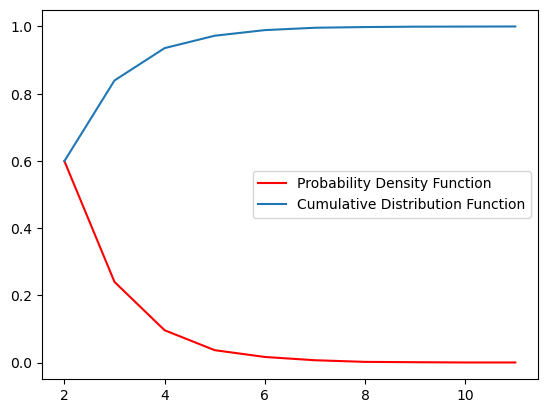

In [16]:

probab_geom = float(input("Enter probability of finding keyword (in decimals): ")) 
searches = 10000
sample = geom.rvs(p=probab_geom, size = searches)

# getting data of the histogram 
count, bins_count = np.histogram(sample) 

# finding the PDF of the histogram using count values 
pdf_geom = count / sum(count) 

# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf_geom = np.cumsum(pdf_geom) 

print("Mean of the distribution is: ", np.mean(sample))
print("Variance of the distribution is: ", np.var(sample))

# plotting PDF and CDF 
plt.plot(bins_count[1:], pdf_geom, color="red", label="Probability Density Function") 
plt.plot(bins_count[1:], cdf_geom, label="Cumulative Distribution Function") 
plt.legend()
plt.show()

(b.) Markov Memoryless and conditional


In [39]:
#conditional = p(X=x|X>3) = p(X ∩ X>3)/p(X>3) = p(X)/1-p(X<=3) = pdf[i]/1-cdf[2]

pdf_geom_xgreater3 = pdf_geom[3:]/(1-cdf_geom[2])
cdf_geom_xgreater3 = np.cumsum(pdf_geom_xgreater3)

sample_xgreater3 = np.delete(sample, np.where(sample <= 3))

print("Mean of the distribution is: ", np.mean(sample_xgreater3))
print("Variance of the distribution is: ", np.var(sample_xgreater3))

for p in range(len(pdf_geom_xgreater3)):
    
    #note that the array already has the conditional probability for each situation.
    #markov property notes P(X = t+s|X > s) = P(t), e.g. P(X = 4| X > 3) = P(X = 1)
    
    print(f"\nEstimates for P(X = {p+1}+3|X>3) and P(X = {p+1})")
    print(round(pdf_geom_xgreater3[p], 3))

    print(round(pdf_geom[p], 3))
    print("\n")

print("Note that as the estimates are close to each other, the Markov Memoryless Property more or less holds.")

Mean of the distribution is:  4.695652173913044
Variance of the distribution is:  1.0812854442344044

Estimates for P(X = 1+3|X>3) and P(X = 1)
0.573
0.599



Estimates for P(X = 2+3|X>3) and P(X = 2)
0.259
0.24



Estimates for P(X = 3+3|X>3) and P(X = 3)
0.109
0.096



Estimates for P(X = 4+3|X>3) and P(X = 4)
0.033
0.037



Estimates for P(X = 5+3|X>3) and P(X = 5)
0.017
0.017



Estimates for P(X = 6+3|X>3) and P(X = 6)
0.005
0.007



Estimates for P(X = 7+3|X>3) and P(X = 7)
0.005
0.002


Note that as the estimates are close to each other, the Markov Memoryless Property more or less holds.
